
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Fabián Rubilar Álvarez 

**Rol**: 201510509-K

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline


In [35]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [36]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [37]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [38]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [39]:
#Primero veamos los tipos de datos del DF y cierta información que puede ser de utilidad

digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
c00       1797 non-null int32
c01       1797 non-null int32
c02       1797 non-null int32
c03       1797 non-null int32
c04       1797 non-null int32
c05       1797 non-null int32
c06       1797 non-null int32
c07       1797 non-null int32
c08       1797 non-null int32
c09       1797 non-null int32
c10       1797 non-null int32
c11       1797 non-null int32
c12       1797 non-null int32
c13       1797 non-null int32
c14       1797 non-null int32
c15       1797 non-null int32
c16       1797 non-null int32
c17       1797 non-null int32
c18       1797 non-null int32
c19       1797 non-null int32
c20       1797 non-null int32
c21       1797 non-null int32
c22       1797 non-null int32
c23       1797 non-null int32
c24       1797 non-null int32
c25       1797 non-null int32
c26       1797 non-null int32
c27       1797 non-null int32
c28       1797 non-null int32
c29       1797 non-null

In [40]:
#Veamos si hay valores nulos en las columnas

if True not in digits.isnull().any().values:
    print('No existen valores nulos')

No existen valores nulos


In [41]:
#Veamos que elementos únicos tenemos en la columna target del DF

digits.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [42]:
#Veamos cuantos registros por clase existen luego de saber que hay 10 tipos de clase en la columna target

(u,v) = np.unique(digits['target'] , return_counts = True)
for i in range(0,10):
    print ('Tenemos', v[i], 'registros para', u[i])


Tenemos 178 registros para 0
Tenemos 182 registros para 1
Tenemos 177 registros para 2
Tenemos 183 registros para 3
Tenemos 181 registros para 4
Tenemos 182 registros para 5
Tenemos 181 registros para 6
Tenemos 179 registros para 7
Tenemos 174 registros para 8
Tenemos 180 registros para 9


In [43]:
#Como tenemos 10 tipos de elementos en target, veamos las caracteristicas que poseen los datos

caract_datos = [len(digits[digits['target'] ==i ].target) for i in range(0,10)]

In [44]:
print ('El total de los datos es:', sum(caract_datos))
print ('El máximo de los datos es:', max(caract_datos))
print ('El mínimo de los datos es:', min(caract_datos))
print ('El promedio de los datos es:', 0.1*sum(caract_datos))

El total de los datos es: 1797
El máximo de los datos es: 183
El mínimo de los datos es: 174
El promedio de los datos es: 179.70000000000002


Por lo tanto, tenemos un promedio de 180 (aproximando por arriba) donde el menor valor es de 174 y el mayor valor es de 183.

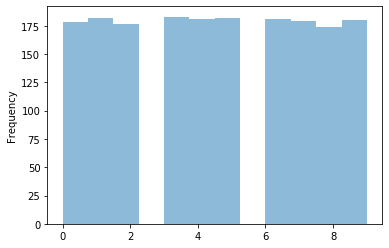

In [45]:
#Para mejorar la visualización, construyamos un histograma

digits.target.plot.hist(bins=12, alpha=0.5)

Sabemos que cada dato corresponde a una matriz cuadrada de dimensión 8 con entradas de 0 a 16. Cada dato proviene de otra matriz cuadrada de dimensión 32, el cual ha sido procesado por un método de reducción de dimensiones. Además, cada dato es una imagen de un número entre 0 a 9, por lo tanto se utilizan 8$\times$8 = 64 bits, sumado al bit para guardar información. Así, como tenemos 1797 datos, calculamos 1797$\times$65 = 116805 bits en total. Ahora, si no se aplica la reducción de dimensiones, tendriamos 32$\times$32$\times$1797 = 1840128 bits, que es aproximadamente 15,7 veces mayor. 

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [46]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

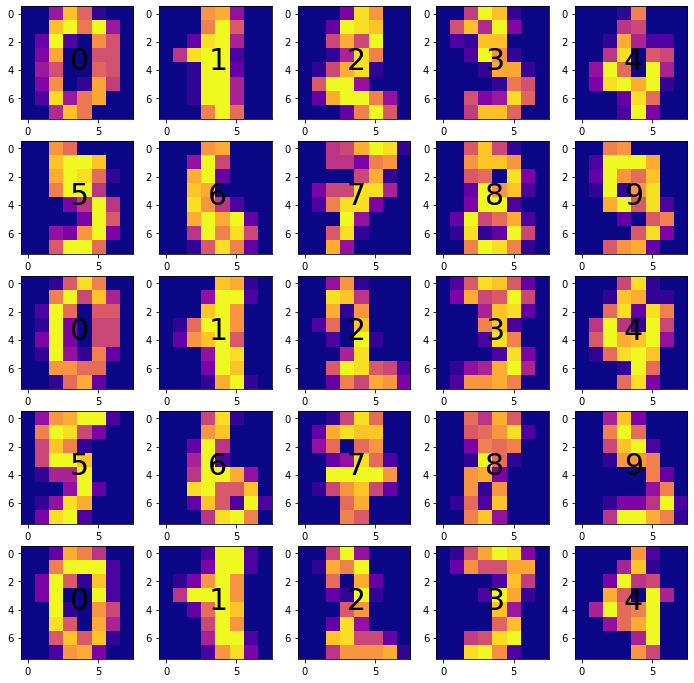

In [47]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for x in range(0,5):
    for y in range(0,5):
        axs[x,y].imshow(digits_dict['images'][5*x+y], cmap = 'plasma')
        axs[x,y].text(3,4,s = digits['target'][5*x+y], fontsize = 30)

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [48]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Ahora vemos los conjuntos de testeo y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('El conjunto de testeo tiene la siguiente cantidad de datos:', len(y_test))
print('El conjunto de entrenamiento tiene la siguiente cantidad de datos:', len(y_train))


El conjunto de testeo tiene la siguiente cantidad de datos: 360
El conjunto de entrenamiento tiene la siguiente cantidad de datos: 1437


In [50]:
#REGRESIÓN LOGÍSTICA

from sklearn.linear_model import LogisticRegression
from metrics_classification import *
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

#Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, y_train) #Ajustando el modelo

#Matriz de confusión
y_true =  list(y_test)
y_pred = list(rlog.predict(X_test))
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

#Métricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


C:\Users\elele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  4 36]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.9611  0.9624     0.9605  0.9609


In [51]:
#K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing

#Creando el modelo
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train) #Ajustando el modelo

#Matriz de confusión
y_true =  list(y_test)
y_pred = list(knn.predict(X_test))
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

#Métricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.9861  0.9878     0.9879  0.9878


In [52]:
#ÁRBOL DE DECISIÓN

from sklearn.tree import DecisionTreeClassifier

#Creando el modelo
add = DecisionTreeClassifier(max_depth=10)
add = add.fit(X_train, y_train) #Ajustando el modelo

#Matriz de confusión
y_true =  list(y_test)
y_pred = list(add.predict(X_test))
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

#Métricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


Matriz de confusion:
 
[[29  0  0  0  3  1  0  0  0  0]
 [ 0 21  2  1  1  0  0  0  2  1]
 [ 1  0 28  3  0  0  0  1  0  0]
 [ 0  0  1 30  0  0  0  0  2  1]
 [ 0  0  1  1 38  0  2  3  1  0]
 [ 0  0  1  0  1 43  1  0  0  1]
 [ 0  0  0  0  1  0 33  0  0  1]
 [ 0  1  0  1  1  0  0 31  0  0]
 [ 0  2  1  1  1  2  0  0 23  0]
 [ 0  1  0  2  1  1  0  2  0 33]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.8583  0.8547     0.8591  0.8556


In [53]:
#GRIDSEARCH

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

# rango de parametros
rango_criterion = ['gini','entropy']
rango_max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150])
param_grid = dict(criterion = rango_criterion, max_depth = rango_max_depth)
print(param_grid)
print('\n')

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print('\n')
print(gs.best_params_)


{'criterion': ['gini', 'entropy'], 'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  15,
        20,  30,  40,  50,  70,  90, 120, 150])}


0.8761308281141267


{'criterion': 'entropy', 'max_depth': 11}


C:\Users\elele\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [54]:
#Cross Validation 

from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()
precision = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
med = precision.mean()#Media
desv = precision.std()#Desviación estandar 
a = med - desv
b = med + desv
print('(',a,',', b,')')


( 0.9754505939165444 , 0.9953155512780988 )


In [55]:
#Curva de Validación

from sklearn.model_selection import validation_curve

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

C:\Users\elele\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


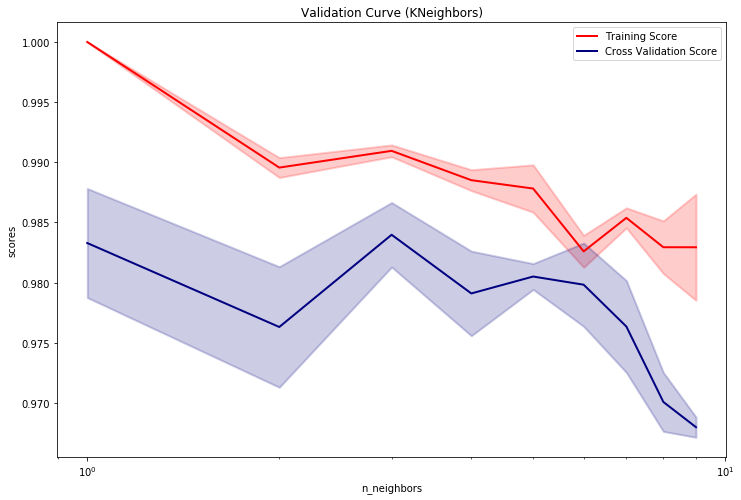

In [56]:
parameters = np.arange(1,10)
train_scores, test_scores = validation_curve(model,
                                             X_train,
                                             y_train,
                                             param_name = 'n_neighbors',
                                             param_range = parameters,
                                             scoring = 'accuracy',
                                             n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure(figsize=(12,8))
plt.title('Validation Curve (KNeighbors)')
plt.xlabel('n_neighbors')
plt.ylabel('scores')
#Train
plt.semilogx(parameters,
             train_scores_mean,
             label = 'Training Score',
             color = 'red',
             lw =2)
plt.fill_between(parameters,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.2,
                 color = 'red',
                 lw = 2)

#Test
plt.semilogx(parameters,
             test_scores_mean,
             label = 'Cross Validation Score',
             color = 'navy',
             lw =2)
plt.fill_between(parameters,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.2,
                 color = 'navy',
                 lw = 2)

plt.legend(loc = 'Best')
plt.show()

In [57]:
#Curva AUC–ROC


### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una reducción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [58]:
#Selección de atributos 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df = pd.DataFrame(X)
df.columns = [f'P{k}' for k in range(1,X.shape[1]+1)]
df['y']=y
print('Vemos que el df respectivo es de la forma:')
print('\n')
print(df.head())

# Separamos las columnas objetivo
x_training = df.drop(['y',], axis=1)
y_training = df['y']

# Aplicando el algoritmo univariante de prueba F.
k = 40  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
print('\n')
print('Los atributos quedan como:')
print('\n')
print(atributos)

#Veamos que pasa si entrenamos un nuevo modelo K-NEAREST NEIGHBORS con los atributos seleccionados anteriormente

x=df[atributos]
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

#Creando el modelo
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train) #Ajustando el modelo

#Matriz de confusión
y_true =  list(y_test)
y_pred = list(knn.predict(x_test))
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

#Métricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores ")
print("")
print(df_metrics)

Vemos que el df respectivo es de la forma:


   P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  ...  P56  P57  P58  P59  P60  P61  \
0   0   0   5  13   9   1   0   0   0    0  ...    0    0    0    6   13   10   
1   0   0   0  12  13   5   0   0   0    0  ...    0    0    0    0   11   16   
2   0   0   0   4  15  12   0   0   0    0  ...    0    0    0    0    3   11   
3   0   0   7  15  13   1   0   0   0    8  ...    0    0    0    7   13   13   
4   0   0   0   1  11   0   0   0   0    0  ...    0    0    0    0    2   16   

   P62  P63  P64  y  
0    0    0    0  0  
1   10    0    0  1  
2   16    9    0  2  
3    9    0    0  3  
4    4    0    0  4  

[5 rows x 65 columns]


Los atributos quedan como:


['P3', 'P4', 'P6', 'P7', 'P10', 'P11', 'P14', 'P18', 'P19', 'P20', 'P21', 'P22', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P51', 'P52', 'P53', 'P54', 'P55', 'P59', 'P60', 'P61', 'P62', 'P63']

Matr

C:\Users\elele\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\elele\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


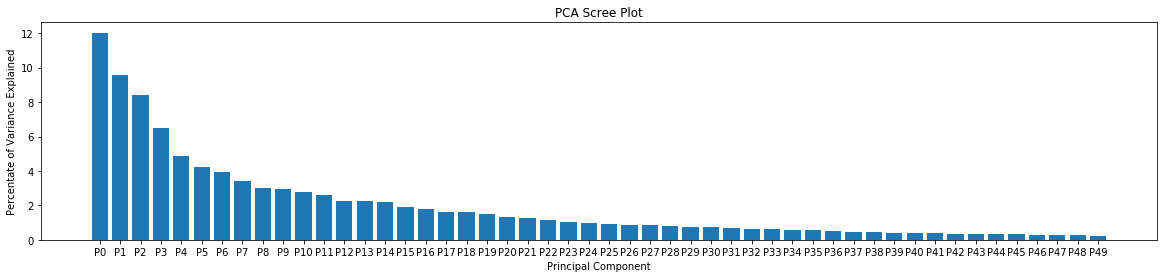

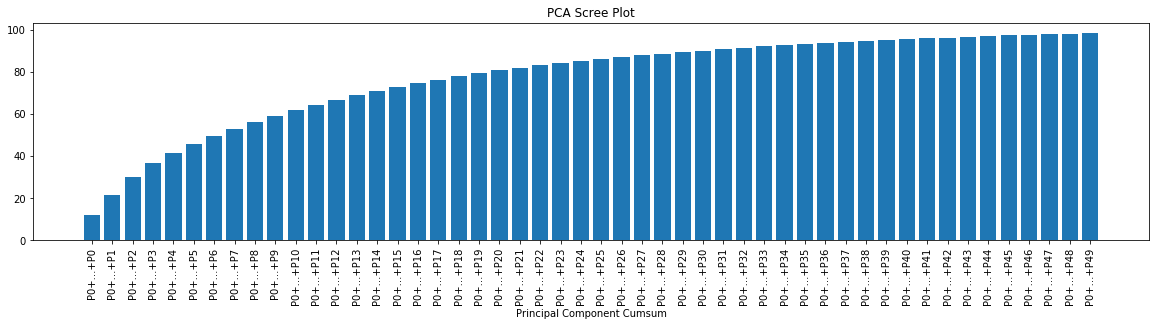

In [59]:
#Extracción de atributos 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(X)

n_components = 50
pca = PCA(n_components)
principalComponents = pca.fit_transform(x)

# Graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [ 'P'+str(i) for i in range(n_components)]

plt.figure(figsize=(20,4))
plt.bar(x= range(0,n_components), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

# graficar varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = [ 'P' + str(0) + '+...+P' + str(i) for i in range(n_components) ]

plt.figure(figsize=(20,4))
plt.bar(x= range(0,n_components), height=percent_variance_cum, tick_label=columns)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [60]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
   
    X = digits.drop(columns = "target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    model.fit(X_train, y_train) # ajustando el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
    

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

   
    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation = 'nearest', cmap = 'gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, color = color)
            ax[i][j].text(7, 0, label_true, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, color = 'blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()


**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

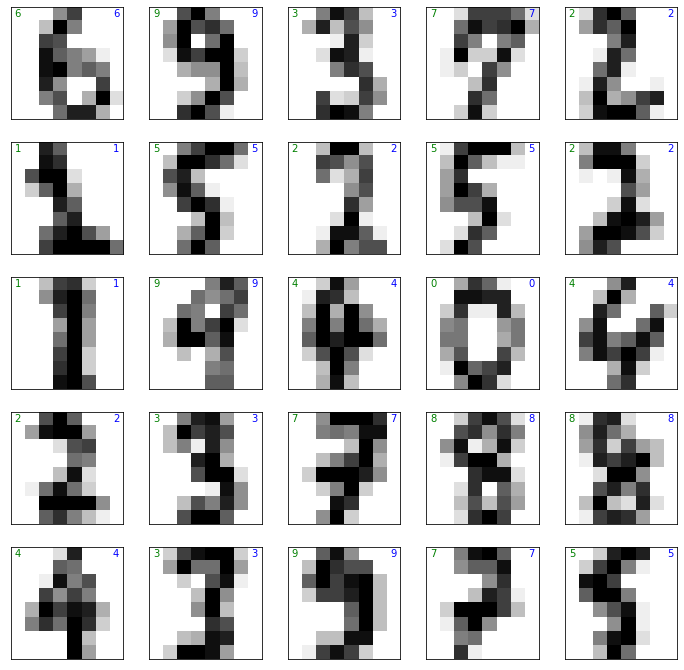

In [61]:
mostar_resultados(digits, KNeighborsClassifier(), nx=5, ny=5,label = "correctos")

IndexError: index 5 is out of bounds for axis 0 with size 5

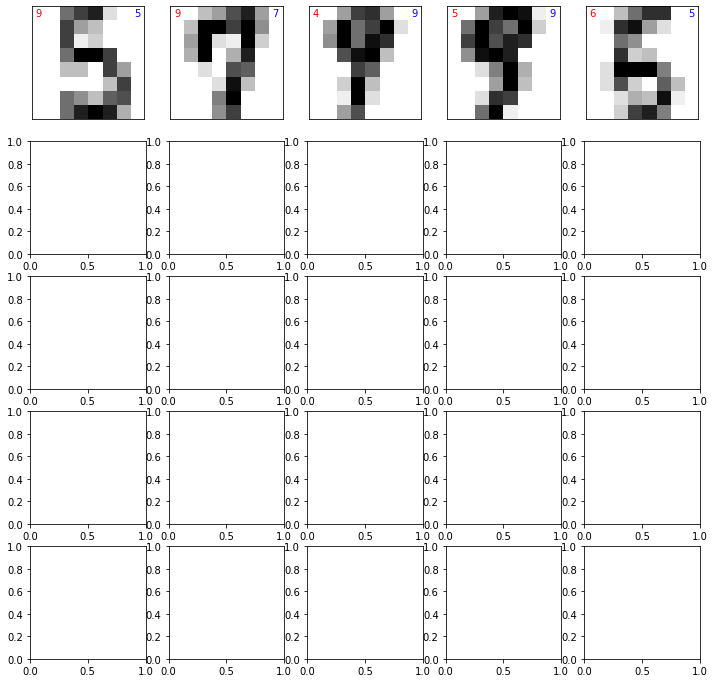

In [62]:
mostar_resultados(digits, neighbors.KNeighborsClassifier(), nx=5, ny=5,label = "incorrectos")


### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Vemos que las métricas tenían valores cercanos a uno, pero nunca llegando a la unidad, lo mismo ocurre con las matrices de confusión. Hay errores, pero son pequeños. Ahora, para algún trabajo futuro, se podría realizar un estudio de como encontrar mejores modelos y además mejorar la experiencia y manejo del tema por parte del alumno. 
